                        count   mean        std   min    25%   50%   75%  \
Age                     200.0  38.85  13.969007  18.0  28.75  36.0  49.0   
Annual Income (k$)      200.0  60.56  26.264721  15.0  41.50  61.5  78.0   
Spending Score (1-100)  200.0  50.20  25.823522   1.0  34.75  50.0  73.0   

                          max  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0   

Female    112
Male       88
Name: Gender, dtype: int64 

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

Pair plots of various features:

Visual representation of the annual income and Spending score relation by gender:



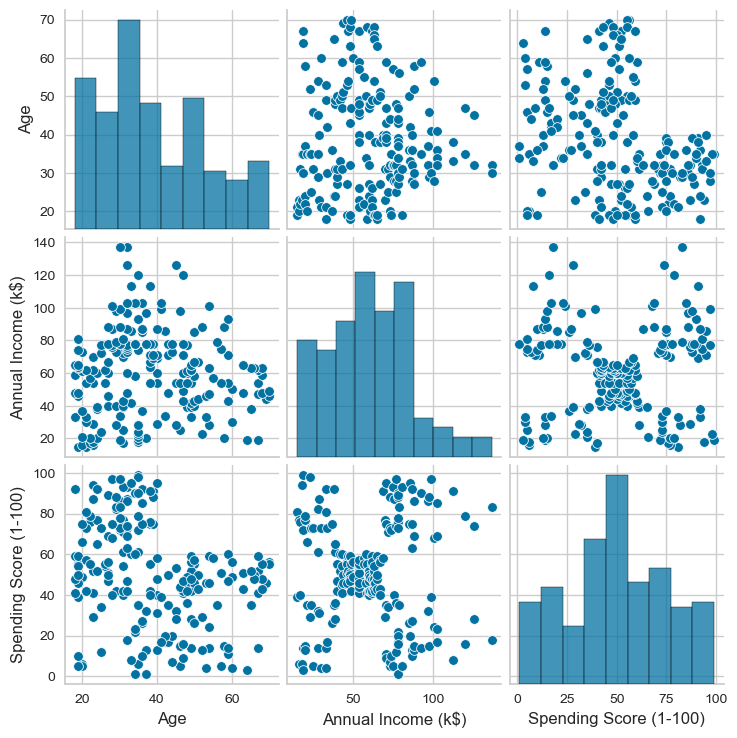

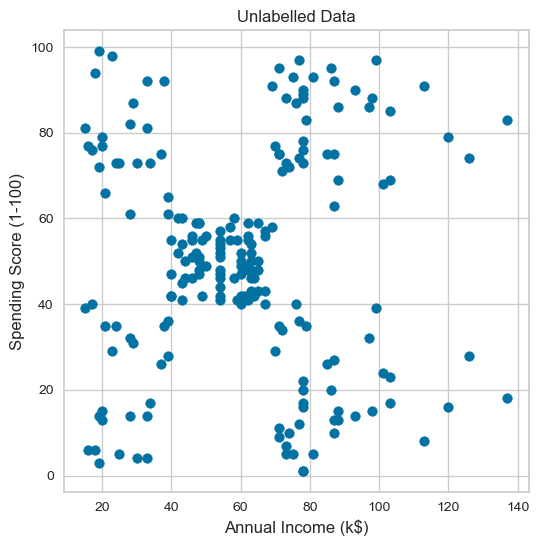

<Figure size 600x600 with 0 Axes>

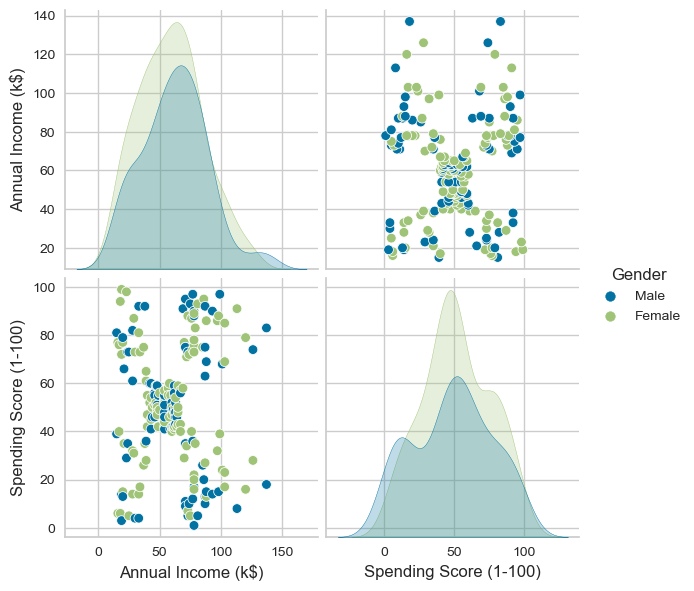

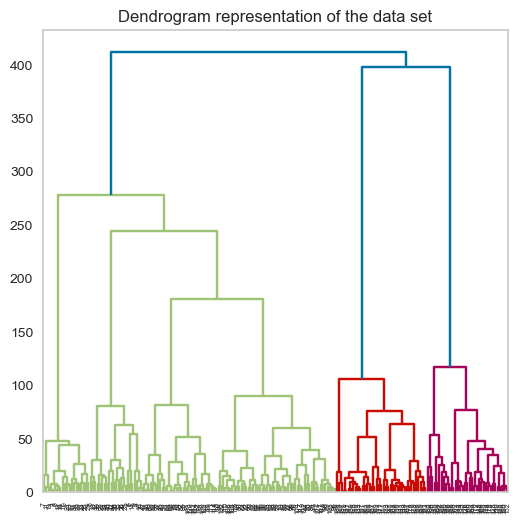

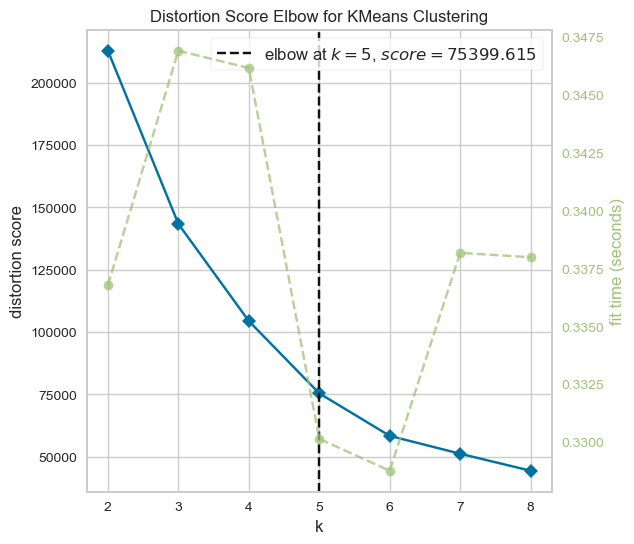

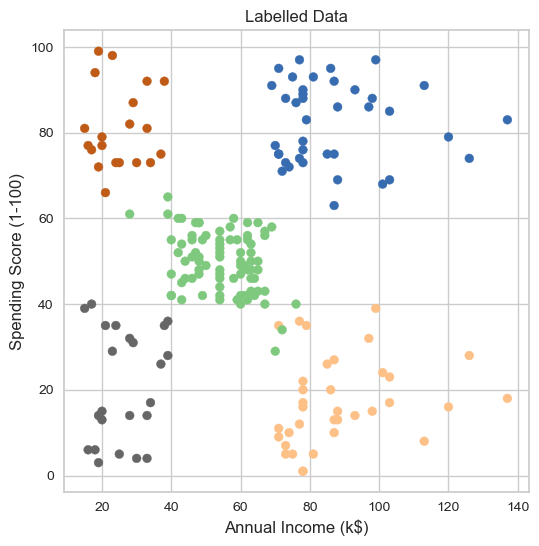

In [2]:
#Hierarchical clustering (agglomerative) algorithm

# This program aims to cluster customers based on their features such as:
# annual income and spending score. Clustering means creating groups of 
# customers with similar features from the data set.
# To calculate the optimal number of clusters we will be using a dendrogram
# representation and the Elbow method (helps findind the best balance 
# between minimising distance in the clusters and avoiding overfitting)
# finally a graphical representation of the labelled clusters is provided.
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
# to suppress UserWarning sets OMP_NUM_THREADS environment variable
os.environ['OMP_NUM_THREADS'] = '1'
# suppressing specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
# load the data
data = pd.read_csv('Mall_Customers.csv')
# we dont' need customer id
data = data.drop("CustomerID", axis = 1)
# exploring the data
# descriptive statistics of the dataset
print(data.describe().T, "\n")
# number of occurrences of each gender
print(data["Gender"].value_counts(), "\n")
# number of missing values in each column
print(data.isnull().sum(), "\n")

# visualising the features 
print("Pair plots of various features:\n")
sns.pairplot(data)
# Visualising the relationship between Annual Income 
# and spending score with scaled data
print("Visual representation of the annual income and Spending score relation by gender:\n")
plt.figure(figsize = (6, 6))
plt.scatter(data["Annual Income (k$)"], 
            data["Spending Score (1-100)"])
plt.title('Unlabelled Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
# visualising how data looks like, colored differently by gender
plt.figure(figsize = (6, 6))
sns.pairplot(data.loc[:,['Annual Income (k$)','Spending Score (1-100)', 
                         'Gender']], hue = "Gender", height = 3)
plt.show() 
# encoding Gender label, to have numerical values
labelEncoder = preprocessing.LabelEncoder() 
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
# creating and printing the dendrogram of the dataset
plt.figure(figsize =(6, 6)) 
plt.grid(False)
plt.title('Dendrogram representation of the data set') 
dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))
# determing the optimal number of clusters using Elbow method
plt.figure(figsize =(6, 6)) 
elbowMethod = KElbowVisualizer(KMeans(), k=8, timings= True)
elbowMethod.fit(data)
elbowMethod.show();
plt.show()
# creating the agglomerative Clustering classifier
AC = AgglomerativeClustering(n_clusters=5)
clusters = AC.fit_predict(data)
# adding a clusters column to the data
data["Clusters"] = clusters
# printing the labelled data
fig = plt.figure(figsize=(6,6))
subPlt = plt.subplot(111, label="subPlot")
subPlt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], 
           s=40, c=data["Clusters"], marker='o', cmap = "Accent")
subPlt.set_title("Labelled Data")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()